In [10]:
# TensorFlow and Keras for building and training the model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# NumPy for array manipulations
import numpy as np

# PIL for image loading and processing
from PIL import Image

# OS for file path handling
import os



In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
dataset_path = "/content/drive/MyDrive/Fruits_1"
# Create an ImageDataGenerator to normalize images and split dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values to [0,1] and reserve 20% for validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training generator (80% of the data)
train_gen = datagen.flow_from_directory(
    dataset_path,           # Main dataset folder
    target_size=(128, 128), # Resize images to 128x128
    batch_size=16,          # Number of images per batch
    class_mode='categorical', # Multiclass classification
    subset='training'       # Use as training data
)

# Validation generator (20% of the data)
val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='validation'     # Use as validation data
)


Found 2154 images belonging to 1 classes.
Found 538 images belonging to 1 classes.


In [13]:

import tensorflow as tf
from tensorflow.keras import layers, models

# Create a lightweight CNN for Edge AI
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),

    # Block 1
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    # Block 2
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    # Block 3
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(train_gen.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 826,529 (3.15 MB)

 Trainable params: 826,529 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=3
)

Epoch 1/3
135/135 ━━━━━━━━━━━━━━━━━━━━ 45s 336ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/3
135/135 ━━━━━━━━━━━━━━━━━━━━ 83s 345ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/3
135/135 ━━━━━━━━━━━━━━━━━━━━ 81s 335ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [20]:
loss, accuracy = model.evaluate(val_gen)
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Loss: {loss:.4f}")


34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Accuracy: 1.0000
Validation Loss: 0.0000


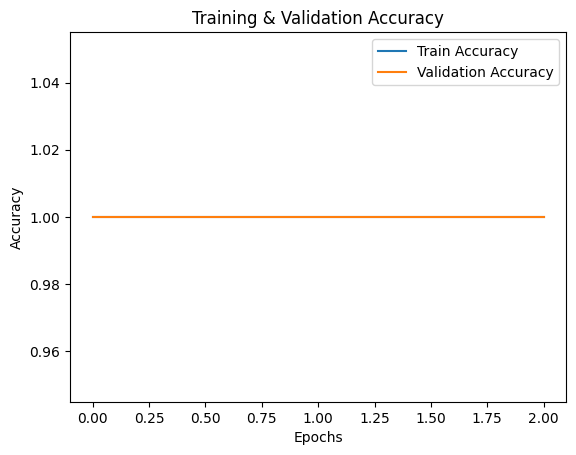

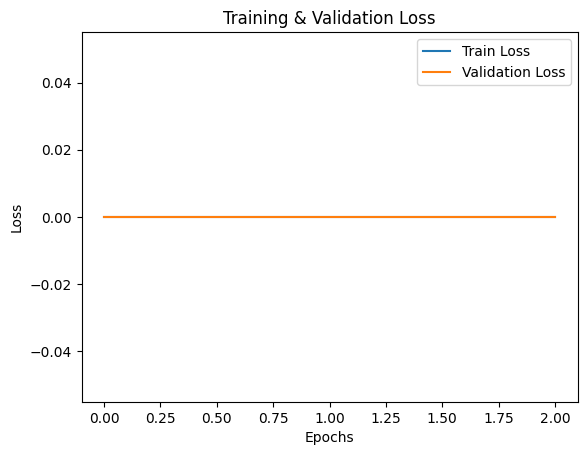

In [21]:
import matplotlib.pyplot as plt

# -----------------------------
# Plot Training vs Validation Accuracy
# -----------------------------
plt.plot(history.history['accuracy'], label='Train Accuracy')       # Accuracy during training
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # Accuracy on validation data

plt.xlabel('Epochs')      # X-axis label
plt.ylabel('Accuracy')    # Y-axis label
plt.title('Training & Validation Accuracy')  # Title of the graph
plt.legend()              # Show legend
plt.show()                # Display the plot


# -----------------------------
# Plot Training vs Validation Loss
# -----------------------------
plt.plot(history.history['loss'], label='Train Loss')       # Loss during training
plt.plot(history.history['val_loss'], label='Validation Loss') # Loss on validation data

plt.xlabel('Epochs')      # X-axis label
plt.ylabel('Loss')        # Y-axis label
plt.title('Training & Validation Loss')  # Title of the graph
plt.legend()              # Show legend
plt.show()                # Display the plot


In [22]:
# Save the trained Keras model in .h5 format

model.save("fruit_classifier_model.h5")

print("Model saved successfully!")


Model saved successfully!


In [23]:
import tensorflow as tf

# Convert the saved .h5 model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Enable optimizations to make the model smaller and faster for edge devices
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Save the TFLite model file
with open("fruit_classifier_model.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model created successfully!")


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Saved artifact at '/tmp/tmp332n7dk6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137339388410192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137339388411344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137339388410000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137339388411536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137339388408848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137339388411728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137339388410768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137339388409232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137339268465488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137339268465680: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model cre